In [1]:
%matplotlib inline

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

In [2]:
mpl.rcParams['figure.figsize'] = (16, 8)

# Data Science mit OpenStreetMap

### Nikolai Janakiev [@njanakiev](http://twitter.com/njanakiev/)

![Quote](assets/quote.png)

# Überblick

### - Datenakquise

### - Datentransformation

### - Datenanalyse

### - Datenvisualisierung

# Datenakquise

# Einrichtungen (Amenities) in OpenStreetMap
- Attribute sind als key-value pairs gespeichert
- [Amenity key](https://wiki.openstreetmap.org/wiki/Key:amenity)

![OSM Key Amenity](assets/osm_key_amenity.png)

# Taginfo Statistiken

![taginfo](assets/taginfo.png)

# Häufigsten Einrichtungen in OpenStreetMap

![taginfo amenities](assets/taginfo_amenities.png)

# OpenStreetMap Stadt Regionen

![Dresden Relation](assets/dresden_relation.png)

# Eurostat (Statistische Amt der Europäischen Union)

- [ec.europa.eu/eurostat](https://ec.europa.eu/eurostat)
- [NUTS - Nomenclature of territorial units for statistics](https://ec.europa.eu/eurostat/web/nuts/background)

![Eurostat Nuts](assets/eurostat_nuts.jpg)

# Overpass API

- [overpass-turbo.eu/](http://overpass-turbo.eu/)

In [1]:
import requests

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
    [out:json];
    area["ISO3166-1"="DE"][admin_level=2]->.search;
    node[amenity="restaurant"](area.search);
    out count;"""
response = requests.get(overpass_url, params={'data': overpass_query})
response.json()

{'version': 0.6,
 'generator': 'Overpass API 0.7.55.5 2ca3f387',
 'osm3s': {'timestamp_osm_base': '2019-03-11T19:14:02Z',
  'timestamp_areas_base': '2019-03-11T18:08:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'count',
   'id': 0,
   'tags': {'nodes': '74361',
    'ways': '0',
    'relations': '0',
    'areas': '0',
    'total': '74361'}}]}

# Daten aus OpenStreetMap Dateien Extrahieren

- Dateien aus [Geofabrik](http://download.geofabrik.de/) oder direkt Regionen aus OpenStreetMap exportieren
- [Osmium Tool](https://osmcode.org/osmium-tool/) für die Kommandozeile oder [PyOsmium](https://docs.osmcode.org/pyosmium/latest/intro.html) mit Python

In [4]:
import osmium

class RestaurantHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)
        self.num_restaurants = 0

    def node(self, n):
        if n.tags.get('amenity') == 'restaurant':
            self.num_restaurants += 1
        
handler = RestaurantHandler()
handler.apply_file('data/liechtenstein-latest.osm.pbf')
print('Number of Restaurants: ', handler.num_restaurants)

Number of Restaurants:  45


# Datentransformation

# GeoPandas

- [Pandas](https://pandas.pydata.org/) Dataframes mit einer Geometrie Spalte
- Geospatial extension für Pandas
- Verwendet [shapely](http://toblerity.org/shapely/manual.html) für geometrische operationen und [fiona](https://github.com/Toblerity/Fiona) für Dateizugriff
- Visualisierung verwendet [descartes](https://bitbucket.org/sgillies/descartes/) und [matplotlib](https://matplotlib.org/)

## Installation

```bash
conda install -c conda-forge geopandas
```

# Laden von Geodaten von PostGIS

In [6]:
import psycopg2
import geopandas as gpd

with psycopg2.connect(database="osm_data_science", user="postgres", 
                      password='password', host='localhost') as connection:
    
    gdf = gpd.GeoDataFrame.from_postgis(
        """SELECT osm_id, amenity, state, geom FROM osm_amenities_areas""", 
        connection, geom_col='geom')

gdf.head()

,osm_id,amenity,state,geom
0,476,university,Steiermark,POINT (15.4498326391065 47.0777236761512)
1,11101,townhall,Wien,POINT (16.3573412415296 48.2108412144281)
2,11936,school,Wien,POINT (16.4103468335947 48.2842460993475)
3,14604,school,Niederösterreich,POINT (16.778381402358 48.0259891360606)
4,27945,school,Wien,POINT (16.2909158154218 48.1690868739775)


# Alle Einrichtungen in Österreich

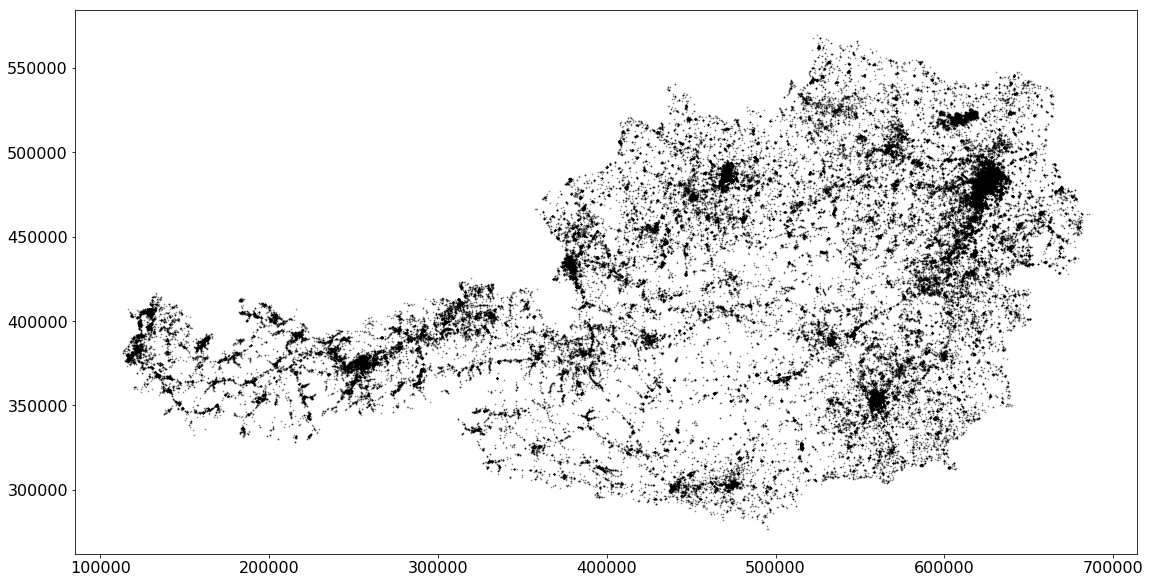

In [7]:
gdf.to_crs({'init': 'epsg:31287'}).plot(
    figsize=(20, 10), alpha=0.4, markersize=0.5, color='k');

# Alle Einrichtungen in Europa

![Europe Amenities](assets/europe_amenities.png)

# Alle Einrichtungen in Sachsen

![Saxony Amenities](assets/saxony_amenities.png)

# Datenanalyse

# Was sind die Häufigsten Einrichtungen in Sachsen?

![Dresden Amenities](assets/saxony_amenity_counts.png)

# Was sind die Häufigsten Einrichtungen in Salzburg Land?

![Salzburg Amenities](assets/salzburg_amenity_counts.png)

## Wittgenstein’s Ruler

Wenn man ein Lineal hernimmt um einen Tisch zu messen, nimmt man auch den Tisch her um das Lineal zu messen

## [This slide intentionally left blank](https://this-page-intentionally-left-blank.org/)

# Was macht eine Französische/Deutsche Stadt oder Region aus?

# Statistische Klassifizierung

![classification](assets/classification.png)

# Logistische Regression

![Logistic Regression](assets/logistic_regression.png)

# Laden und Vorbereitung der Daten

In [1]:
import psycopg2
import geopandas as gpd

with psycopg2.connect(database="osm_data_science", user="postgres", 
                      password='postgres', host='localhost') as connection:
    gdf = gpd.GeoDataFrame.from_postgis(
            "SELECT * FROM city_amenity_counts", 
            connection, geom_col='geom')

gdf.loc[:, 'parking':'veterinary'].head()

,parking,place_of_worship,school,bench,restaurant,fuel,cafe,fast_food,bank,waste_basket,...,waste_disposal,marketplace,bus_station,university,college,parking_entrance,swimming_pool,theatre,taxi,veterinary
0,0.001411,0.000246,0.000305,0.001454,0.001369,0.000116,0.000587,0.000420,0.000180,0.000943,...,0.000027,0.000023,0.000004,0.000054,0.000005,0.000097,0.000023,0.000039,0.000086,0.000043
1,0.005232,0.000507,0.000468,0.005668,0.001579,0.000232,0.001196,0.000636,0.000329,0.003164,...,0.000014,0.000039,0.000018,0.000314,0.000007,0.000468,0.000079,0.000089,0.000143,0.000079
2,0.010564,0.000431,0.000573,0.002580,0.001526,0.000238,0.000532,0.000517,0.000421,0.000710,...,0.000015,0.000010,0.000005,0.000056,0.000005,0.001485,0.000010,0.000041,0.000066,0.000041
3,0.004517,0.000559,0.000441,0.004504,0.001775,0.000230,0.000750,0.000434,0.000506,0.000947,...,0.000000,0.000013,0.000020,0.000230,0.000026,0.000460,0.000000,0.000132,0.000171,0.000046
4,0.002205,0.000756,0.000654,0.002331,0.001921,0.000260,0.001252,0.000614,0.000378,0.000472,...,0.000031,0.000024,0.000016,0.000394,0.000055,0.000189,0.000000,0.000087,0.000094,0.000047


In [2]:
# Get only Germany and France
gdf_DE_FR = gdf[(gdf['country_code'] == 'DE') | \
                (gdf['country_code'] == 'FR')].copy()

# Die Feature Vektoren und Klassen wählen

In [3]:
X = gdf_DE_FR.loc[:, 'parking':'veterinary'].values
y = gdf_DE_FR['country_code'].map({'DE': 0, 'FR': 1}).values

### In Training und Test Datensatz aufteilen

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1000)

# Logistische Regression mit Scikit-Learn

In [9]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [10]:
print('Training score : {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing score  : {:.4f}'.format(clf.score(X_test, y_test)))

Training score : 0.8936
Testing score  : 0.8293


### Berechne die Wahrscheinlichkeit dass eine Stadt Französisch ist

In [11]:
gdf['frenchness'] = gdf.loc[:, 'parking':'veterinary'].apply(
    lambda row: clf.predict_proba([row.values])[:, 1][0], axis=1)

# Datenvisualisierung

# Visualisierung mit Folium
- Visualisierungsbibliothek mit [Leaflet.js](https://leafletjs.com/)

In [22]:
import folium
import matplotlib

cmap = matplotlib.cm.get_cmap('cool', 5)

m = folium.Map(location=[49.5734053, 7.588576], zoom_start=5)
for i, row in gdf.iterrows():

    rgb = cmap(row['frenchness'])[:3]
    hex_color = matplotlib.colors.rgb2hex(rgb)
    
    folium.CircleMarker([row['geom'].y, row['geom'].x], 
                        radius=5, popup=row['city'], 
                        fill_color=hex_color, fill_opacity=1,
                        opacity=0.0).add_to(m)
m.save('maps/folium_map.html')

In [3]:
from IPython.display import IFrame

IFrame('maps/folium_map.html', width=1024, height=600)

![folium visualization](assets/folium_map.png)

# Logistische Regression anhand von Eurostat NUTS Regionen

- [osm.janakiev.com/](http://osm.janakiev.com/)

![NUTS Leaflet](assets/leaflet_nuts_defr.png)

# Data Science mit OpenStreetMap

### Nikolai Janakiev [@njanakiev](http://twitter.com/njanakiev/)

- Visualization @ [osm.janakiev.com/](http://osm.janakiev.com/)
- Slides @ [janakiev.com/osm-data-science/](https://janakiev.com/osm-data-science/)
- Repository @ [github.com/njanakiev/osm-data-science](https://github.com/njanakiev/osm-data-science)

### Weitere Resourcen

- [Loading Data from OpenStreetMap with Python and the Overpass API](https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/)
- [Predict Economic Indicators with OpenStreetMap](https://janakiev.com/blog/osm-predict-economic-indicators/)
- [Compare Countries and Cities with OpenStreetMap and t-SNE](https://janakiev.com/blog/osm-compare-countries-and-cities/)